In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from keras.optimizers import Adam
from sklearn import metrics
import cv2
from keras.utils import plot_model
import matplotlib.pyplot as plt
import pydot
import pathlib

Using TensorFlow backend.


In [14]:
current_dir = str(pathlib.Path(__file__).parent.absolute())
x = np.load(f'{current_dir}/X.npy')
y = np.load(f'{current_dir}/y.npy')
np.random.seed(2)
p = np.random.permutation(x.shape[0])
x = x[p]
y = y[p]

In [15]:
x_test = x[:3100]
y_test = y[:3100]

x_train = x[3100:]
y_train = y[3100:]

In [ ]:
# np.save('x_test', x_test)
# np.save('y_test', y_test)
# np.save('x_train', x_train)
# np.save('y_train', y_train)

In [2]:
# x_test = np.load('x_test.npy')
# y_test = np.load('y_test.npy')
# x_train = np.load('x_train.npy')
# y_train = np.load('y_train.npy')

In [4]:
model = Sequential()

model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D())
model.add(Conv2D(8, kernel_size=5, activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D())
model.add(Conv2D(16, kernel_size=5, activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D())
model.add(Conv2D(16, kernel_size=5, activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile(optimizer=Adam(learning_rate=0.0000005, decay=1e-2), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
histories = []

In [62]:
histories.append(model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=10))

Train on 28769 samples, validate on 3100 samples
Epoch 1/10
28769/28769 [==============================] - 13s 438us/step - loss: 0.1515 - accuracy: 0.9368 - val_loss: 0.2401 - val_accuracy: 0.9074
Epoch 2/10
28769/28769 [==============================] - 11s 395us/step - loss: 0.1534 - accuracy: 0.9372 - val_loss: 0.2399 - val_accuracy: 0.9081
Epoch 3/10
28769/28769 [==============================] - 11s 395us/step - loss: 0.1508 - accuracy: 0.9364 - val_loss: 0.2398 - val_accuracy: 0.9081
Epoch 4/10
28769/28769 [==============================] - 11s 397us/step - loss: 0.1547 - accuracy: 0.9353 - val_loss: 0.2398 - val_accuracy: 0.9084
Epoch 5/10
28769/28769 [==============================] - 11s 393us/step - loss: 0.1511 - accuracy: 0.9365 - val_loss: 0.2397 - val_accuracy: 0.9081
Epoch 6/10
28769/28769 [==============================] - 11s 396us/step - loss: 0.1483 - accuracy: 0.9391 - val_loss: 0.2397 - val_accuracy: 0.9084
Epoch 7/10
28769/28769 [==============================] -

In [33]:
with open(f'{current_dir}/model/model.json', 'w') as json_file:
    json_file.write(model.to_json())
    model.save_weights(f'{current_dir}/model/model.h5')

In [34]:
with open(f'{current_dir}/model/model.json', 'r') as json_file:
    model = keras.models.model_from_json(json_file.read())
    model.load_weights(f'{current_dir}/model/model.h5')

In [ ]:
model.evaluate(x_test, y_test)model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


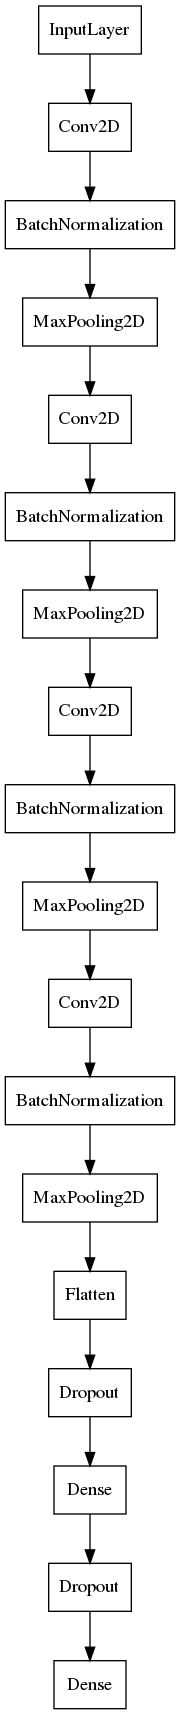

In [34]:
plot_model(model, to_file='model.png', show_layer_names=False)

In [75]:
history = dict()
history['val_accuracy'] = histories[0].history['val_accuracy'] + histories[1].history['val_accuracy']
history['val_loss'] = histories[0].history['val_loss'] + histories[1].history['val_loss']
history['accuracy'] = histories[0].history['accuracy'] + histories[1].history['accuracy']
history['loss'] = histories[0].history['loss'] + histories[1].history['loss']

# print(histories[0].history['val_accuracy'])
# print(histories[1].history['val_accuracy'])

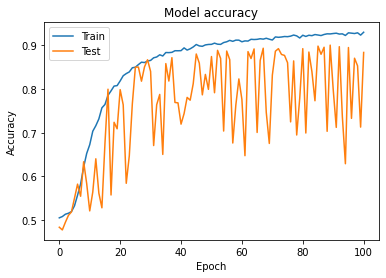

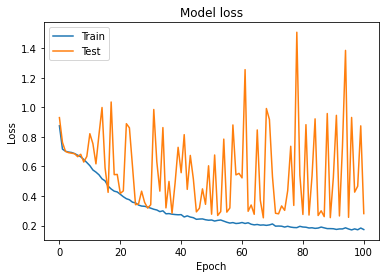

In [83]:

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy')
plt.show()


# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

plt.savefig('loss')


In [35]:
#ROC curve

y_pred = model.predict(x_test).ravel()
fpr, tpr, _ = metrics.roc_curve(y_test, np.round(y_pred))
auc = metrics.auc(fpr, tpr)

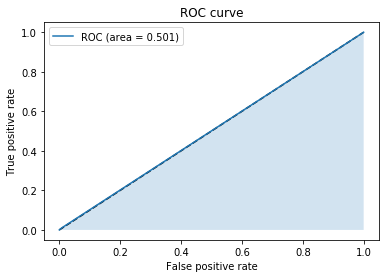

In [36]:
#Draw ROC Curve

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(fpr, tpr, alpha=0.2)
plt.show()

In [32]:
#Confusion Matrix

tn, fp, fn, tp = metrics.confusion_matrix(y_test, [round(i) for i in y_pred]).ravel()
print(f'True Negative: {tn}, False Positive: {fp}, False Negative: {fn}, True Positive: {tp}')

True Negative: 1453, False Positive: 12, False Negative: 1618, True Positive: 17


In [39]:
tp = 0
tn = 0
fp = 0
fn = 0

y_pred = np.round(y_pred)

for (y_pred_i, y_i) in zip(y_pred, y_test):
    if y_i == 1:
        if y_pred_i == 1:
            tp += 1
            
        else:
            fn += 1
            
    else:
        if y_pred_i == 0:
            tn += 1
        else:
            fp += 1
            
print(tn, fp, fn, tp)

1453 12 1618 17
